<a href="https://colab.research.google.com/github/gathoni/global-development/blob/master/East_African_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from plotnine import *

In [55]:
# upload CSV file
globalDev = pd.read_csv('global_development.csv')
globalDev.head()

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Health.Total Population,Data.Infrastructure.Mobile Cellular Subscriptions,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land,Data.Rural Development.Arable Land Percent,Data.Rural Development.Land Area,Data.Rural Development.Rural Population,Data.Rural Development.Rural Population Growth,Data.Rural Development.Surface Area,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth
0,Canada,1980,15.4,7.0,1.754,78.59,71.32,74.866341,0.997669,24277000.0,0.0,0.0,9595000.0,39.562351,669030.0,7.357225,1.827821,4.879744,9093510.0,5918004,0.833712,9984670.0,2.669706,75.623,1.050578
1,Canada,1981,15.4,7.1,1.740,78.73,71.60,75.078049,1.293245,24593000.0,0.0,0.0,9979000.0,40.712240,663960.0,7.301471,1.818526,4.918123,9093510.0,5985198,1.129019,9984670.0,2.704456,75.663,1.346126
2,Canada,1982,15.3,7.0,1.700,79.11,72.02,75.478537,1.240595,24900000.0,0.0,0.0,10294500.0,41.570761,658890.0,7.245717,1.810120,4.956502,9093510.0,6047712,1.039060,9984670.0,2.738217,75.712,1.305333
3,Canada,1983,15.1,7.1,1.690,79.23,72.30,75.680488,1.205555,25202000.0,0.0,0.0,10335442.0,41.320642,662760.0,7.288275,1.789779,4.960241,9093510.0,6080235,0.536333,9984670.0,2.771427,75.874,1.419293
4,Canada,1984,15.0,7.0,1.680,79.55,72.69,76.036341,1.002812,25456000.0,0.0,0.0,10468344.0,41.429346,666640.0,7.330943,1.773217,4.963870,9093510.0,6100530,0.333231,9984670.0,2.799359,76.035,1.214785


In [56]:
# check for missing data
globalDev.isna().sum()

Country                                                             0
Year                                                                0
Data.Health.Birth Rate                                              0
Data.Health.Death Rate                                              0
Data.Health.Fertility Rate                                          0
Data.Health.Life Expectancy at Birth, Female                        0
Data.Health.Life Expectancy at Birth, Male                          0
Data.Health.Life Expectancy at Birth, Total                         0
Data.Health.Population Growth                                       0
Data.Health.Total Population                                        0
Data.Infrastructure.Mobile Cellular Subscriptions                   0
Data.Infrastructure.Mobile Cellular Subscriptions per 100 People    0
Data.Infrastructure.Telephone Lines                                 0
Data.Infrastructure.Telephone Lines per 100 People                  0
Data.Rural Developme

In [0]:
# East African Countries
east_africa = ['Uganda','Tanzania','Kenya','Rwanda']
globalEA = globalDev[globalDev.Country.isin(east_africa)]


In [58]:
globalEA['Country'].unique()

array(['Tanzania', 'Rwanda', 'Kenya', 'Uganda'], dtype=object)

In [0]:
# export to CSV
globalEA.to_csv('globalEA.csv', index=False)

In [60]:
# check for missing data
globalEA.isna().sum()

Country                                                             0
Year                                                                0
Data.Health.Birth Rate                                              0
Data.Health.Death Rate                                              0
Data.Health.Fertility Rate                                          0
Data.Health.Life Expectancy at Birth, Female                        0
Data.Health.Life Expectancy at Birth, Male                          0
Data.Health.Life Expectancy at Birth, Total                         0
Data.Health.Population Growth                                       0
Data.Health.Total Population                                        0
Data.Infrastructure.Mobile Cellular Subscriptions                   0
Data.Infrastructure.Mobile Cellular Subscriptions per 100 People    0
Data.Infrastructure.Telephone Lines                                 0
Data.Infrastructure.Telephone Lines per 100 People                  0
Data.Rural Developme

In [51]:
# Validating the data types 
globalEA.dtypes

Country                                                              object
Year                                                                  int64
Data.Health.Birth Rate                                              float64
Data.Health.Death Rate                                              float64
Data.Health.Fertility Rate                                          float64
Data.Health.Life Expectancy at Birth, Female                        float64
Data.Health.Life Expectancy at Birth, Male                          float64
Data.Health.Life Expectancy at Birth, Total                         float64
Data.Health.Population Growth                                       float64
Data.Health.Total Population                                        float64
Data.Infrastructure.Mobile Cellular Subscriptions                   float64
Data.Infrastructure.Mobile Cellular Subscriptions per 100 People    float64
Data.Infrastructure.Telephone Lines                                 float64
Data.Infrast

In [0]:
# Changing the Data Rural Development Population to float
globalEA['Data.Rural Development.Rural Population'] = globalEA['Data.Rural Development.Rural Population'].astype(float)

In [14]:
globalEA.dtypes

Country                                                                     object
Year                                                                datetime64[ns]
Data.Health.Birth Rate                                                     float64
Data.Health.Death Rate                                                     float64
Data.Health.Fertility Rate                                                 float64
Data.Health.Life Expectancy at Birth, Female                               float64
Data.Health.Life Expectancy at Birth, Male                                 float64
Data.Health.Life Expectancy at Birth, Total                                float64
Data.Health.Population Growth                                              float64
Data.Health.Total Population                                               float64
Data.Infrastructure.Mobile Cellular Subscriptions                          float64
Data.Infrastructure.Mobile Cellular Subscriptions per 100 People           float64
Data

In [61]:
# Dropping columns
globalEA.drop(['Data.Infrastructure.Telephone Lines','Data.Infrastructure.Telephone Lines per 100 People','Data.Rural Development.Arable Land','Data.Rural Development.Arable Land Percent'], axis= 1,inplace=True)
globalEA

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Health.Total Population,Data.Infrastructure.Mobile Cellular Subscriptions,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Rural Development.Agricultural Land,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Land Area,Data.Rural Development.Rural Population,Data.Rural Development.Rural Population Growth,Data.Rural Development.Surface Area,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth
952,Tanzania,1980,46.995,15.596,6.685,51.987,48.647,50.276268,3.116857,18111999.0,0.0,0.000000,330000.0,37.254459,885800.0,15550781,2.557041,947300.0,20.447052,14.141,6.584829
953,Tanzania,1981,46.739,15.425,6.653,52.191,48.876,50.493073,3.124317,18686808.0,0.0,0.000000,330000.0,37.254459,885800.0,15966943,2.640966,947300.0,21.095967,14.555,6.009932
954,Tanzania,1982,46.469,15.279,6.618,52.359,49.065,50.671829,3.136535,19282215.0,0.0,0.000000,330000.0,37.254459,885800.0,16394510,2.642600,947300.0,21.768136,14.976,5.987982
955,Tanzania,1983,46.199,15.149,6.580,52.508,49.227,50.827488,3.143771,19898033.0,0.0,0.000000,330000.0,37.254459,885800.0,16831945,2.633205,947300.0,22.463347,15.409,5.994041
956,Tanzania,1984,45.939,15.029,6.542,52.645,49.368,50.966537,3.139727,20532688.0,0.0,0.000000,330000.0,37.254459,885800.0,17278052,2.615846,947300.0,23.179824,15.851,5.967796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,Uganda,2009,45.573,11.106,6.338,56.259,55.020,55.624390,3.360077,31778799.0,8554864.0,26.920036,137620.0,68.875432,199810.0,27364088,3.021542,241550.0,159.045088,13.892,5.484407
3294,Uganda,2010,45.115,10.655,6.248,57.258,55.762,56.491756,3.358844,32864328.0,9383734.0,28.552947,139120.0,69.626145,199810.0,28201209,3.013335,241550.0,164.477894,14.189,5.474216
3295,Uganda,2011,44.639,10.239,6.155,58.198,56.438,57.296537,3.359655,33987213.0,12828264.0,37.744383,140620.0,70.376858,199810.0,29061786,3.005927,241550.0,170.097658,14.492,5.472643
3296,Uganda,2012,44.152,9.865,6.060,59.045,57.039,58.017537,3.358517,35148064.0,16696992.0,47.504727,140620.0,70.376858,199810.0,29946151,2.997669,241550.0,175.907432,14.800,5.461547


In [16]:
# check duplicates
globalEA.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
131    False
132    False
133    False
134    False
135    False
Length: 136, dtype: bool

In [17]:
# Count duplicates
dups = globalEA.groupby(globalEA.columns.tolist()).size().reset_index().rename(columns={0:'count'})
dups['count'].sum() 

136

the dataset has no duplicates therefore there was no dropping to be done

In [62]:
#fixing the messy columns
globalEA.columns = globalEA.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
globalEA.head()

,country,year,data_health_birth_rate,data_health_death_rate,data_health_fertility_rate,data_health_life_expectancy_at_birth_female,data_health_life_expectancy_at_birth_male,data_health_life_expectancy_at_birth_total,data_health_population_growth,data_health_total_population,data_infrastructure_mobile_cellular_subscriptions,data_infrastructure_mobile_cellular_subscriptions_per_100_people,data_rural_development_agricultural_land,data_rural_development_agricultural_land_percent,data_rural_development_land_area,data_rural_development_rural_population,data_rural_development_rural_population_growth,data_rural_development_surface_area,data_urban_development_population_density,data_urban_development_urban_population_percent,data_urban_development_urban_population_percent_growth
952,Tanzania,1980,46.995,15.596,6.685,51.987,48.647,50.276268,3.116857,18111999.0,0.0,0.0,330000.0,37.254459,885800.0,15550781,2.557041,947300.0,20.447052,14.141,6.584829
953,Tanzania,1981,46.739,15.425,6.653,52.191,48.876,50.493073,3.124317,18686808.0,0.0,0.0,330000.0,37.254459,885800.0,15966943,2.640966,947300.0,21.095967,14.555,6.009932
954,Tanzania,1982,46.469,15.279,6.618,52.359,49.065,50.671829,3.136535,19282215.0,0.0,0.0,330000.0,37.254459,885800.0,16394510,2.642600,947300.0,21.768136,14.976,5.987982
955,Tanzania,1983,46.199,15.149,6.580,52.508,49.227,50.827488,3.143771,19898033.0,0.0,0.0,330000.0,37.254459,885800.0,16831945,2.633205,947300.0,22.463347,15.409,5.994041
956,Tanzania,1984,45.939,15.029,6.542,52.645,49.368,50.966537,3.139727,20532688.0,0.0,0.0,330000.0,37.254459,885800.0,17278052,2.615846,947300.0,23.179824,15.851,5.967796


In [63]:
# Checking the shape of the dataset
globalEA.shape

(136, 21)

In [64]:
# Rename columns
globalEA.columns=['country','year','birth_rate','death_rate','fertility_rate','female_expectancy_at_birth','male_expectancy_at_birth','total_expectancy_at_birth','population_growth','total_population','cellular_subscriptions','cellular_subscriptions_per_100_people','rural_agricultural_land','rural_agricultural_land_percent','rural_land_area','rural_population','rural_population_growth','rural_surface_area','urban_population_density','urban_population_percent','urban_population_percent_growth']
globalEA

,country,year,birth_rate,death_rate,fertility_rate,female_expectancy_at_birth,male_expectancy_at_birth,total_expectancy_at_birth,population_growth,total_population,cellular_subscriptions,cellular_subscriptions_per_100_people,rural_agricultural_land,rural_agricultural_land_percent,rural_land_area,rural_population,rural_population_growth,rural_surface_area,urban_population_density,urban_population_percent,urban_population_percent_growth
952,Tanzania,1980,46.995,15.596,6.685,51.987,48.647,50.276268,3.116857,18111999.0,0.0,0.000000,330000.0,37.254459,885800.0,15550781,2.557041,947300.0,20.447052,14.141,6.584829
953,Tanzania,1981,46.739,15.425,6.653,52.191,48.876,50.493073,3.124317,18686808.0,0.0,0.000000,330000.0,37.254459,885800.0,15966943,2.640966,947300.0,21.095967,14.555,6.009932
954,Tanzania,1982,46.469,15.279,6.618,52.359,49.065,50.671829,3.136535,19282215.0,0.0,0.000000,330000.0,37.254459,885800.0,16394510,2.642600,947300.0,21.768136,14.976,5.987982
955,Tanzania,1983,46.199,15.149,6.580,52.508,49.227,50.827488,3.143771,19898033.0,0.0,0.000000,330000.0,37.254459,885800.0,16831945,2.633205,947300.0,22.463347,15.409,5.994041
956,Tanzania,1984,45.939,15.029,6.542,52.645,49.368,50.966537,3.139727,20532688.0,0.0,0.000000,330000.0,37.254459,885800.0,17278052,2.615846,947300.0,23.179824,15.851,5.967796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,Uganda,2009,45.573,11.106,6.338,56.259,55.020,55.624390,3.360077,31778799.0,8554864.0,26.920036,137620.0,68.875432,199810.0,27364088,3.021542,241550.0,159.045088,13.892,5.484407
3294,Uganda,2010,45.115,10.655,6.248,57.258,55.762,56.491756,3.358844,32864328.0,9383734.0,28.552947,139120.0,69.626145,199810.0,28201209,3.013335,241550.0,164.477894,14.189,5.474216
3295,Uganda,2011,44.639,10.239,6.155,58.198,56.438,57.296537,3.359655,33987213.0,12828264.0,37.744383,140620.0,70.376858,199810.0,29061786,3.005927,241550.0,170.097658,14.492,5.472643
3296,Uganda,2012,44.152,9.865,6.060,59.045,57.039,58.017537,3.358517,35148064.0,16696992.0,47.504727,140620.0,70.376858,199810.0,29946151,2.997669,241550.0,175.907432,14.800,5.461547


In [65]:
# Accuracy check
# Confirm whether agricultural land divided by the surface area percentage is equal to agricultural land percentage
al=globalEA['rural_agricultural_land']
sa=globalEA['rural_land_area']

perc=((al/sa)*100)
globalEA['percentage'] = perc
globalEA.loc[globalEA.percentage == globalEA.rural_agricultural_land_percent, 'equal'] = 'True' 
globalEA.loc[globalEA.percentage != globalEA.rural_agricultural_land_percent , 'not_equal'] = 'False' 
globalEA.equal.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

True    12
Name: equal, dtype: int64

In [66]:
al=globalEA['rural_agricultural_land']
sa=globalEA['rural_land_area']

perc=((al/sa)*100)
globalEA['percentage'] = perc
globalEA.loc[globalEA.percentage != globalEA.rural_agricultural_land_percent , 'not_equal'] = 'False' 
globalEA.not_equal.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


False    124
Name: not_equal, dtype: int64

In [67]:
t = globalEA[['country','year','rural_agricultural_land','rural_agricultural_land_percent','equal']]
t = t.loc[globalEA['equal'] == 'True']
t

,country,year,rural_agricultural_land,rural_agricultural_land_percent,equal
975,Tanzania,2003,342000.0,38.609167,True
980,Tanzania,2008,356500.0,40.246105,True
1775,Rwanda,1987,18300.0,74.179165,True
1777,Rwanda,1989,18530.0,75.111471,True
1788,Rwanda,2000,16610.0,67.328739,True
1796,Rwanda,2008,18000.0,72.963113,True
2698,Kenya,1992,268770.0,47.223882,True
2700,Kenya,1994,268400.0,47.158871,True
2701,Kenya,1995,272320.0,47.847630,True
3264,Uganda,1980,106100.0,53.100445,True


In [68]:
f = globalEA[['country','year','rural_agricultural_land','rural_agricultural_land_percent','not_equal']]
f = f.loc[globalEA['not_equal'] == 'False']
f

,country,year,rural_agricultural_land,rural_agricultural_land_percent,not_equal
952,Tanzania,1980,330000.0,37.254459,False
953,Tanzania,1981,330000.0,37.254459,False
954,Tanzania,1982,330000.0,37.254459,False
955,Tanzania,1983,330000.0,37.254459,False
956,Tanzania,1984,330000.0,37.254459,False
...,...,...,...,...,...
3293,Uganda,2009,137620.0,68.875432,False
3294,Uganda,2010,139120.0,69.626145,False
3295,Uganda,2011,140620.0,70.376858,False
3296,Uganda,2012,140620.0,70.376858,False


In [69]:
# Drop more columns

globalEA.drop(['equal','not_equal','percentage'],axis=1,inplace=True)
globalEA

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,year,birth_rate,death_rate,fertility_rate,female_expectancy_at_birth,male_expectancy_at_birth,total_expectancy_at_birth,population_growth,total_population,cellular_subscriptions,cellular_subscriptions_per_100_people,rural_agricultural_land,rural_agricultural_land_percent,rural_land_area,rural_population,rural_population_growth,rural_surface_area,urban_population_density,urban_population_percent,urban_population_percent_growth
952,Tanzania,1980,46.995,15.596,6.685,51.987,48.647,50.276268,3.116857,18111999.0,0.0,0.000000,330000.0,37.254459,885800.0,15550781,2.557041,947300.0,20.447052,14.141,6.584829
953,Tanzania,1981,46.739,15.425,6.653,52.191,48.876,50.493073,3.124317,18686808.0,0.0,0.000000,330000.0,37.254459,885800.0,15966943,2.640966,947300.0,21.095967,14.555,6.009932
954,Tanzania,1982,46.469,15.279,6.618,52.359,49.065,50.671829,3.136535,19282215.0,0.0,0.000000,330000.0,37.254459,885800.0,16394510,2.642600,947300.0,21.768136,14.976,5.987982
955,Tanzania,1983,46.199,15.149,6.580,52.508,49.227,50.827488,3.143771,19898033.0,0.0,0.000000,330000.0,37.254459,885800.0,16831945,2.633205,947300.0,22.463347,15.409,5.994041
956,Tanzania,1984,45.939,15.029,6.542,52.645,49.368,50.966537,3.139727,20532688.0,0.0,0.000000,330000.0,37.254459,885800.0,17278052,2.615846,947300.0,23.179824,15.851,5.967796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,Uganda,2009,45.573,11.106,6.338,56.259,55.020,55.624390,3.360077,31778799.0,8554864.0,26.920036,137620.0,68.875432,199810.0,27364088,3.021542,241550.0,159.045088,13.892,5.484407
3294,Uganda,2010,45.115,10.655,6.248,57.258,55.762,56.491756,3.358844,32864328.0,9383734.0,28.552947,139120.0,69.626145,199810.0,28201209,3.013335,241550.0,164.477894,14.189,5.474216
3295,Uganda,2011,44.639,10.239,6.155,58.198,56.438,57.296537,3.359655,33987213.0,12828264.0,37.744383,140620.0,70.376858,199810.0,29061786,3.005927,241550.0,170.097658,14.492,5.472643
3296,Uganda,2012,44.152,9.865,6.060,59.045,57.039,58.017537,3.358517,35148064.0,16696992.0,47.504727,140620.0,70.376858,199810.0,29946151,2.997669,241550.0,175.907432,14.800,5.461547


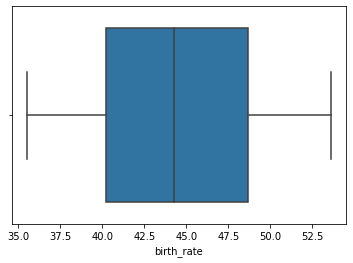

In [70]:
# Find outliers in each column
import seaborn as sns
sns.boxplot(x = globalEA['birth_rate'])

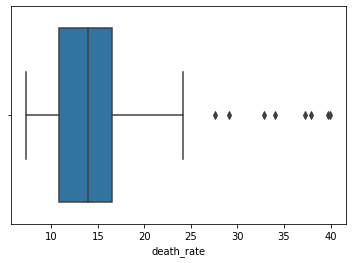

In [71]:
import seaborn as sns
sns.boxplot(x = globalEA['death_rate'])

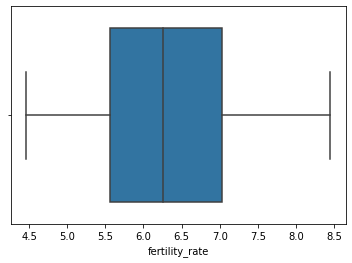

In [72]:
import seaborn as sns
sns.boxplot(x = globalEA['fertility_rate'])

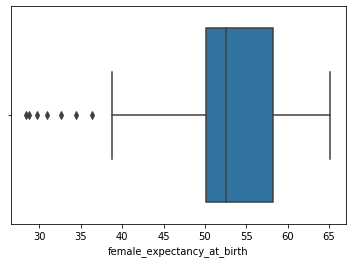

In [73]:
import seaborn as sns
sns.boxplot(x = globalEA['female_expectancy_at_birth'])

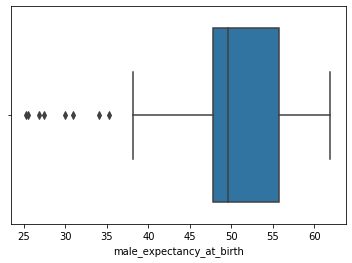

In [74]:
import seaborn as sns
sns.boxplot(x = globalEA['male_expectancy_at_birth'])

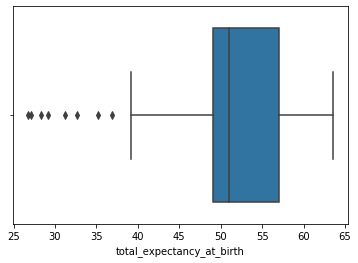

In [31]:
import seaborn as sns
sns.boxplot(x = globalEA['total_expectancy_at_birth'])

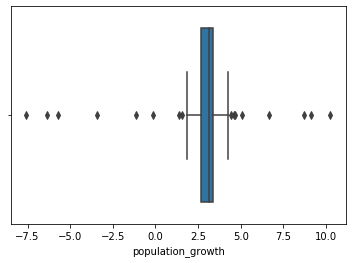

In [32]:
import seaborn as sns
sns.boxplot(x = globalEA['population_growth'])

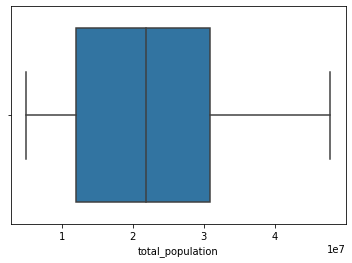

In [33]:
import seaborn as sns
sns.boxplot(x = globalEA['total_population'])

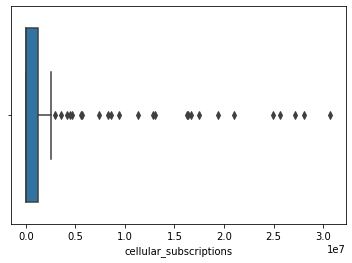

In [34]:
import seaborn as sns
sns.boxplot(x = globalEA['cellular_subscriptions'])

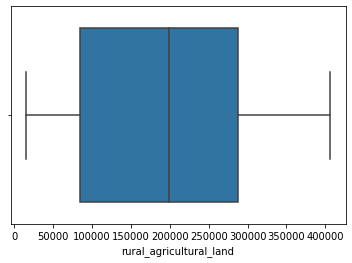

In [35]:
import seaborn as sns
sns.boxplot(x = globalEA['rural_agricultural_land'])

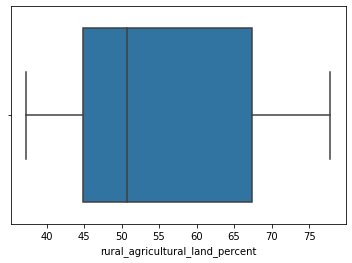

In [36]:
import seaborn as sns
sns.boxplot(x = globalEA['rural_agricultural_land_percent'])

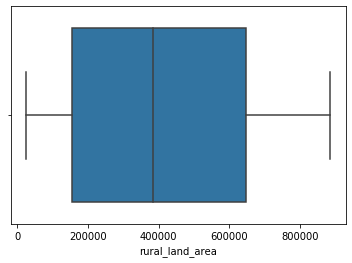

In [37]:
import seaborn as sns
sns.boxplot(x = globalEA['rural_land_area'])

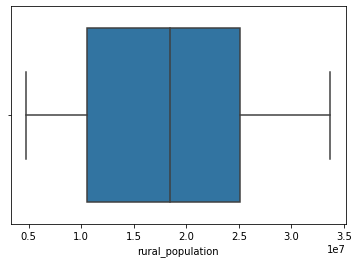

In [38]:
import seaborn as sns
sns.boxplot(x = globalEA['rural_population'])

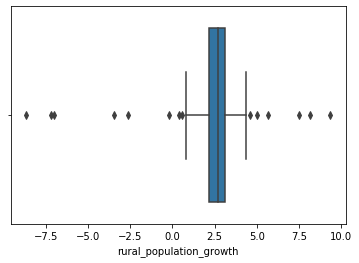

In [39]:
import seaborn as sns
sns.boxplot(x = globalEA['rural_population_growth'])

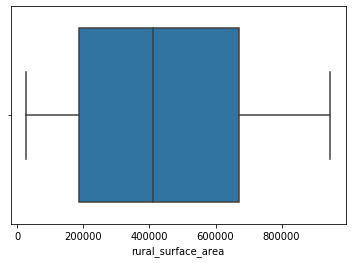

In [40]:
import seaborn as sns
sns.boxplot(x = globalEA['rural_surface_area'])

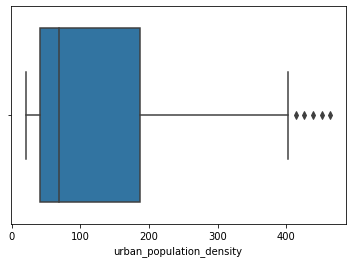

In [41]:
import seaborn as sns
sns.boxplot(x = globalEA['urban_population_density'])

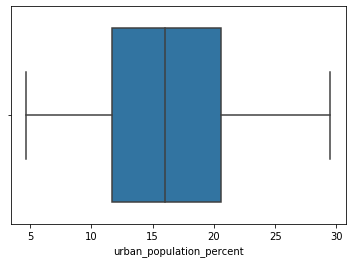

In [42]:
import seaborn as sns
sns.boxplot(x = globalEA['urban_population_percent'])

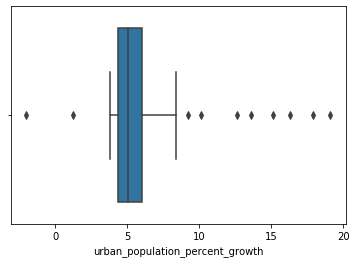

In [43]:
import seaborn as sns
sns.boxplot(x = globalEA['urban_population_percent_growth'])

# **Analysis**

Identify the rate of growth between Kenya. Rwanda, Tz and UG

In [76]:
x = globalEA[['country','year','total_population']]
t = x["year"].isin([2000]) | x["year"].isin([2013])
x[t].reset_index().drop(columns='index')

,country,year,total_population
0,Tanzania,2000,33183093.0
1,Tanzania,2013,47783107.0
2,Rwanda,2000,7853015.0
3,Rwanda,2013,11457801.0
4,Kenya,2000,30478597.0
5,Kenya,2013,43178141.0
6,Uganda,2000,23507800.0
7,Uganda,2013,36345860.0


In [77]:
# Find the difference between in total population bewteen 2000 and 2013 for the four countries
globalEA_20= globalEA[(globalEA['year'] == 2000)]
globalEA_23= globalEA[(globalEA['year'] == 2013)]
tr=globalEA_20['total_population'].reset_index(drop=True)
mr=globalEA_23['total_population'].reset_index(drop=True)
pq=mr-tr
percent=(pq*100)/tr
percent

0    43.998352
1    45.903210
2    41.667089
3    54.611916
Name: total_population, dtype: float64

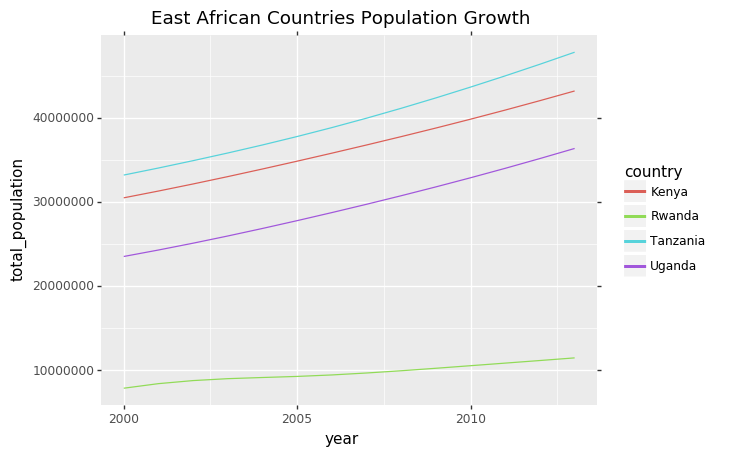

<ggplot: (-9223363283988651260)>


total_population                                    
country            Kenya      Rwanda    Tanzania      Uganda
year                                                        
2000          30478597.0   7853015.0  33183093.0  23507800.0
2001          31285050.0   8395577.0  34020512.0  24275641.0
2002          32126351.0   8760003.0  34895398.0  25088033.0
2003          33000524.0   8987523.0  35806497.0  25943441.0
2004          33905011.0   9126167.0  36760831.0  26838428.0
2005          34834606.0   9254379.0  37765139.0  27766986.0
2006          35785718.0   9429457.0  38824384.0  28724869.0
2007          36757498.0   9660946.0  39942347.0  29711397.0
2008          37752304.0   9928143.0  41119693.0  30728747.0
2009          38773277.0  10222961.0  42353790.0  31778799.0
2010          39824734.0  10529668.0  43639752.0  32864328.0
2011          40909194.0  10836732.0  44973330.0  33987213.0
2012          42027891.0  11144315.0  46354607.0  35148064.0
2013          43178141.0  11457801.0  47783107.0  36345860.0

In [97]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

years = list(range(2000,2014))
ppn = globalEA[globalEA.year.isin(years)]
ppn =ppn.fillna(0)
print((ggplot(ppn,aes(x = 'year',y = 'total_population',color = "country"))
 +geom_line()+labs(title ="East African Countries Population Growth")))

j = pd.pivot_table(ppn[['country',"year","total_population"]],
               index = ["year"],columns =['country'],values = ["total_population"])
j

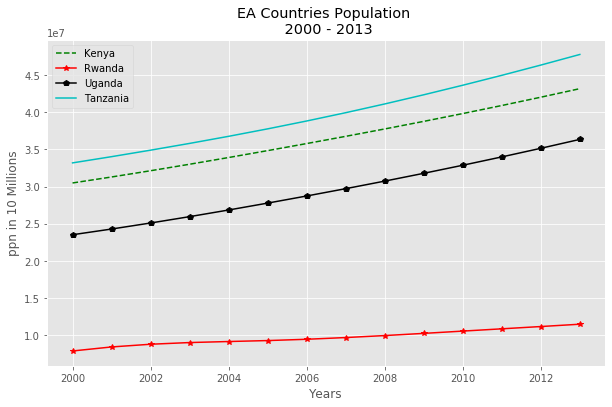

In [98]:
plt.style.use('ggplot')
plt.figure(figsize = (10,6))
plt.plot(j['total_population']['Kenya'],"g--",label ="Kenya")
plt.plot(j['total_population']['Rwanda'],'r-*',label = "Rwanda")
plt.plot(j['total_population']['Uganda'],'k-p',label = "Uganda")
plt.plot(j['total_population']['Tanzania'],'c-',label = "Tanzania")
plt.legend(loc='best')
plt.title("EA Countries Population \n 2000 - 2013")
plt.xlabel("Years")
plt.ylabel("ppn in 10 Millions")
plt.show()

In [79]:
globalEA.columns

Index(['country', 'year', 'birth_rate', 'death_rate', 'fertility_rate',
       'female_expectancy_at_birth', 'male_expectancy_at_birth',
       'total_expectancy_at_birth', 'population_growth', 'total_population',
       'cellular_subscriptions', 'cellular_subscriptions_per_100_people',
       'rural_agricultural_land', 'rural_agricultural_land_percent',
       'rural_land_area', 'rural_population', 'rural_population_growth',
       'rural_surface_area', 'urban_population_density',
       'urban_population_percent', 'urban_population_percent_growth'],
      dtype='object')